In [11]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random
import matplotlib.pyplot as plt

In [13]:
import tensorflow as tf

In [14]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!','.']
data_file = open('intents.json').read()
intents = json.loads(data_file)

In [15]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [16]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(documents), "documents")


190 documents


In [17]:
classes = sorted(list(set(classes)))


In [18]:
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))


In [19]:
training = []
output_empty = [0] * len(classes)
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

In [20]:
random.shuffle(training)
training = np.array(training)
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [21]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90 and logs.get('loss')<0.40):
            print("\nReached 80% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
model = Sequential()
model.add(Dense(132, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 132)               48444     
_________________________________________________________________
dropout (Dropout)            (None, 132)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 38)                5054      
_________________________________________________________________
dropout_1 (Dropout)          (None, 38)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 72)                2808      
Total params: 56,306
Trainable params: 56,306
Non-trainable params: 0
_________________________________________________________________


In [23]:
sgd = SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [24]:
hist = model.fit(np.array(train_x), np.array(train_y), epochs=1500, batch_size=5, verbose=1,callbacks=[callbacks])
model.save('chatbot.h5', hist)

print("model created")

Epoch 1/1500
38/38 [==============================] - 0s 8ms/step - loss: 4.2935 - accuracy: 0.0105
Epoch 2/1500
38/38 [==============================] - 0s 6ms/step - loss: 4.2588 - accuracy: 0.0474
Epoch 3/1500
38/38 [==============================] - 0s 6ms/step - loss: 4.2551 - accuracy: 0.0368
Epoch 4/1500
38/38 [==============================] - 0s 7ms/step - loss: 4.2103 - accuracy: 0.0368
Epoch 5/1500
38/38 [==============================] - 0s 7ms/step - loss: 4.1819 - accuracy: 0.0684
Epoch 6/1500
38/38 [==============================] - 0s 6ms/step - loss: 4.1667 - accuracy: 0.0474
Epoch 7/1500
38/38 [==============================] - 0s 6ms/step - loss: 4.1363 - accuracy: 0.0632
Epoch 8/1500
38/38 [==============================] - 0s 6ms/step - loss: 4.0996 - accuracy: 0.0842
Epoch 9/1500
38/38 [==============================] - 0s 7ms/step - loss: 4.0413 - accuracy: 0.0947
Epoch 10/1500
38/38 [==============================] - 0s 4ms/step - loss: 3.9429 - accuracy: 0.1211

38/38 [==============================] - 0s 3ms/step - loss: 1.1251 - accuracy: 0.6105
Epoch 83/1500
38/38 [==============================] - 0s 2ms/step - loss: 1.0085 - accuracy: 0.6579
Epoch 84/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.9397 - accuracy: 0.6947
Epoch 85/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.9534 - accuracy: 0.7211
Epoch 86/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.9880 - accuracy: 0.6684
Epoch 87/1500
38/38 [==============================] - 0s 2ms/step - loss: 1.0263 - accuracy: 0.6684
Epoch 88/1500
38/38 [==============================] - 0s 2ms/step - loss: 1.0319 - accuracy: 0.7053
Epoch 89/1500
38/38 [==============================] - 0s 2ms/step - loss: 1.0132 - accuracy: 0.6895
Epoch 90/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.8393 - accuracy: 0.7316
Epoch 91/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.8257 - accuracy: 0.7368
Epoc

38/38 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.8158
Epoch 163/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.7895
Epoch 164/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.8105
Epoch 165/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.7737
Epoch 166/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7947
Epoch 167/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.7129 - accuracy: 0.7526
Epoch 168/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.7842
Epoch 169/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.8211
Epoch 170/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.8632
Epoch 171/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.

38/38 [==============================] - 0s 2ms/step - loss: 0.5103 - accuracy: 0.8263
Epoch 243/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.8684
Epoch 244/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.8000
Epoch 245/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.7388 - accuracy: 0.7895
Epoch 246/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.8158
Epoch 247/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.8421
Epoch 248/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.8211
Epoch 249/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.8368
Epoch 250/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.7151 - accuracy: 0.7842
Epoch 251/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.

38/38 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8474
Epoch 323/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8526
Epoch 324/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.5378 - accuracy: 0.8421
Epoch 325/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.8263
Epoch 326/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.8421
Epoch 327/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.8263
Epoch 328/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.8211
Epoch 329/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.8368
Epoch 330/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.8368
Epoch 331/1500
38/38 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.

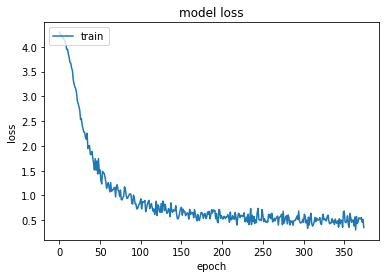

In [25]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [26]:
from keras.models import load_model
model = load_model('chatbot.h5')
import json
import random
intents = json.loads(open('intents.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [27]:
def clean_up_sentence(sentence):
    sent_words = nltk.word_tokenize(sentence)
    sent_words = [lemmatizer.lemmatize(word.lower()) for word in sent_words]
    return sent_words

In [28]:
def bow(sentence, words, show_details=True):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

In [29]:
def predict_class(sentence, model):
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.30
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

In [30]:
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intents)
    return res

In [ ]:
flag=True
resp = []
while(flag==True):
    try:
        res = input('You: ')
        if res=="quit" or res=="stop" or res=='Quit' or res=="Stop":
            flag=False
            print("Bot: Okay")
        else:
            print('Bot:',chatbot_response(res))
    except Exception:
        print("Bot: Sorry I can't understand")


You: hey
Bot: Hi there, how can I help?
You: good morning
Bot: Good to see you again
You: AI\
Bot: Sorry, can't understand you
You: AI
Bot: Please give me more info
You: machine learning
Bot: Please give me more info
